install the zip of 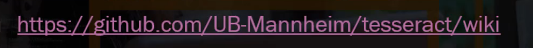 , and  install the exe 

 # this workbook , denotes   how to extract a  text from a image , using image segmentation 

In [2]:
!pip install tesseract

In [2]:
!pip install pytesseract

the tesseract  and pytesseract lib will help with python code , to interact with actual  tesseract software

In [11]:
!pip install opencv-python

In [13]:
!pip install pillow

# main code starts  here 

In [1]:
#import the libraries
from PIL import Image
import pytesseract
import cv2
import re
import pkg_resources


In [3]:
#declaring the exe path for tesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
## printing the tesseract version
print(pkg_resources.working_set.by_key['pytesseract'].version)


0.3.6


In [4]:
print(cv2.__version__)

4.4.0


In [5]:
#loading the image from the disk
image_to_ocr = cv2.imread('images/testing/fox_sample2.png')

In [6]:
image_to_ocr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# next do some preprocessing of the image

# step 1 : covert to grey scale

In [7]:
preprocessed_img = cv2.cvtColor(image_to_ocr, cv2.COLOR_BGR2GRAY)

Otsu’s Thresholding with OpenCV
Anastasia Murzova
Sakshi Seth
AUGUST 5, 2020 1 COMMENT
Feature Detection OpenCV 4 Segmentation Tutorial
In this post, we will examine Otsu’s method for automatic image thresholding.

What is Image Thresholding?
OpenCV Threshold Tutorial
Image thresholding is used to binarize the image based on pixel intensities. The input to such thresholding algorithm is usually a grayscale image and a threshold. The output is a binary image.

If the intensity of a pixel in the input image is greater than a threshold, the corresponding output pixel is marked as white (foreground), and if the input pixel intensity intensity is less than or equal to the threshold, the output pixel location is marked black (background).

Image thresholding is used in many applications as a pre-processing step. For example, you may use it in medical image processing to reveal tumor in a mammogram or localize a natural disaster in satellite images.

A problem with simple thresholding is that you have to manually specify the threshold value. We can manually check how good a threshold is by trying different values but it is tedious and it may break down in the real world.

So, we need a way to automatically determine the threshold. The Otsu’s technique named after its creator Nobuyuki Otsu is a good example of auto thresholding.

Before we jump into the details of the technique let’s understand how image thresholding relates to image segmentation.

Image Tresholding vs. Image Segmentation
Image segmentation refers to the class of algorithms that partition the image into different segments or groups of pixels.

In that sense, image thresholding is the simplest kind of image segmentation because it partitions the image into two groups of pixels — white for foreground, and black for background.

The figure below shows different types of segmentation algorithms:



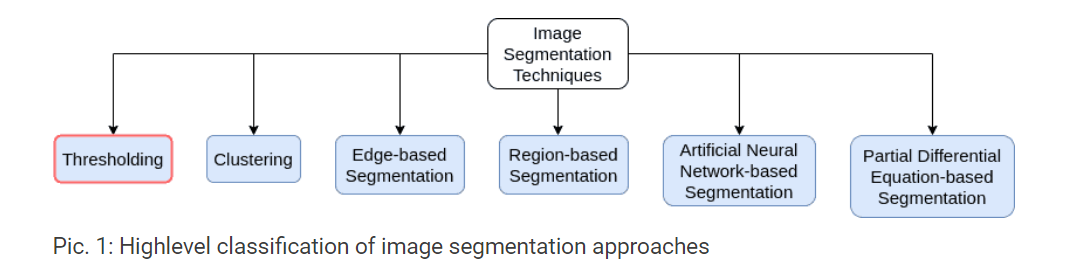

# step 2 : Do binary and otsu thresholding

In [8]:
preprocessed_img = cv2.threshold(preprocessed_img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

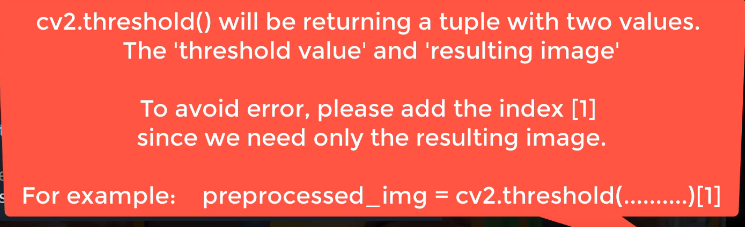

In [9]:
cv2.threshold(preprocessed_img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

(0.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [10]:
preprocessed_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# step 3 : Smooth the image using median blur

   # thresholding images  provides black and white noise, we can see the grains here , we are going to blur the image , so that it will be smoothened image hence we apply median blur

In [11]:
preprocessed_img = cv2.medianBlur(preprocessed_img, 3)

In [12]:
preprocessed_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
#save the preprocessed image temporarily into the disk
cv2.imwrite('temp_img.jpg',preprocessed_img)

True

In [14]:
#read the temp image from disk as pil image
preprocessed_pil_img = Image.open('temp_img.jpg')

In [33]:
#pass the pil image to tesseract to do OCR
text_extracted = pytesseract.image_to_string(preprocessed_pil_img)

In [34]:
text_extracted

'The quick\nbrown fox\njumps over the\nlazy doa.\n\x0c'

In [35]:

text_extracted_1 = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', text_extracted)
print(text_extracted_1)

The quick
brown fox
jumps over the
lazy doa.



In [42]:
#display the original image
cv2.imshow("Actual Image",image_to_ocr)